* ML09 ニューラルネットワーク
  * tensorflow をインストールする
  * Google Colab はインストール済み

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロード
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 学習用データを読み込み、特徴量は標準化、ターゲットは one-hot ベクトル化
iris_data = load_iris()
x = preprocessing.scale(iris_data["data"])
print(x[:3])
y = np.identity(3)[iris_data["target"]]
print(y[:3])

# データを学習用とバリデーション用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
x_train:112 x_test:38 y_train:112 y_test:38


In [7]:
%%time
# ニューラルネットワークのモデルを作成 (サマリを表示) ## 1
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
iris_model = tf.keras.models.Sequential(name='iris_model') # ニューラルネットワークのモデルの箱を用意
iris_model.add(tf.keras.Input(shape=(4,))) # 4入力の入力層
iris_model.add(tf.keras.layers.Dense(units=4, activation='relu')) # 4入力のセルを1個用意、活性化関数は ReLU
iris_model.add(tf.keras.layers.Dense(units=3, activation='softmax')) # セルを3個からなる出力層を用意、活性化関数はソフトマックス
iris_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
iris_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = iris_model.fit(x_train, y_train, # 学習用データ
                         epochs=10000, batch_size=10, verbose=0, shuffle=True, # fit関数で学習を実施
                         validation_data=(x_test, y_test))  # validation用のデータを設定

# 学習したモデルで検証用データの品種を予測し、個体ごとに結果を表示
pred_test = iris_model.predict(x_test)
for i in range(len(pred_test)):
    print(f'y_test[{i}] {y_test[i]} -> pred_test[{i}] [{pred_test[i][0]:.5f}, {pred_test[i][1]:.5f}, {pred_test[i][2]:.5f}]')


Model: "iris_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 2ms/step
y_test[0] [1. 0. 0.] -> pred_test[0] [1.00000, 0.00000, 0.00000]
y_test[1] [0. 1. 0.] -> pred_test[1] [0.00207, 0.99793, 0.00000]
y_test[2] [0. 1. 0.] -> pred_test[2] [0.00007, 0.99990, 0.00003]
y_test[3] [1. 0. 0.] -> pred_test[3] [1.00000, 0.00000, 0.00000]
y_test[4] [0. 0. 1.] -> pred_test[4] [0.00000, 0.00004, 0.99996]
y_test[5] [0. 1. 0.] -> pred_test[5] [0.00051, 0.99641, 0.00308]
y_test[6] [0. 0

iris data: accuracy_score: train data : 0.98214  test data : 1.00000


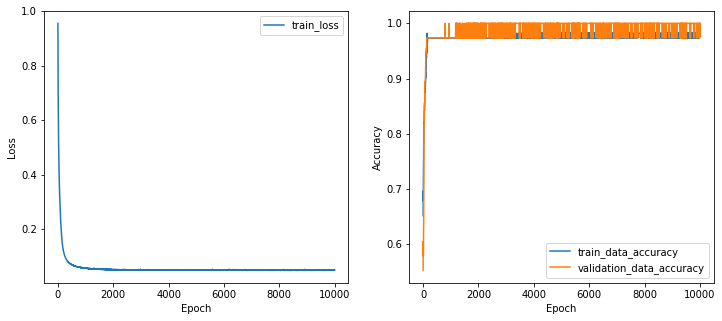

In [12]:
# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = iris_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = iris_model.evaluate(x_test, y_test, verbose=0)
print(f'iris data: accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()
